In [1]:
import sys
import mediapipe as mp
import numpy as np
import cv2 as cv

Input Images

In [2]:
#Webcam Testing

cap = cv.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv.imshow('test', frame)
    
    if cv.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [7]:
#Video Passthrough

from pathlib import Path

cap = cv.VideoCapture('YogaVideo.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    cv.imshow('test', frame)
    
    if cv.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

# Bicep Trainer - Pose Landmarks

In [10]:
#Import Utilities for Mediapipe

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [8]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [11]:
cap = cv.VideoCapture('YogaVideo.mp4')
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        try:
            landmarks = results.pose_landmarks.landmark
            
        except:
            pass
        
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv.imshow('Mediapipe Feed', image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

In [21]:
shoulder_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
thumb_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].y]
hip_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
ankle_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
heel_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
knee_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
foot_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y]

In [22]:
shoulder_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
elbow_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
wrist_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
thumb_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].y]
hip_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
ankle_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
heel_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
knee_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
foot_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y]

In [30]:
import time

In [43]:
cap = cv.VideoCapture('YogaVideo.mp4')

prev_frame_time = 0
new_frame_time = 0

counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
                
        # Recolor image to RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        image = cv.resize(image, (640, 360))
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        
        try:
            landmarks = results.pose_landmarks.landmark
            landmarks_world = results.pose_world_landmarks.landmark
            
            shoulder_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            thumb_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.LEFT_THUMB.value].y]
            hip_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            ankle_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            heel_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
            knee_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            foot_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y]            
            
            shoulder_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            thumb_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_THUMB.value].y]
            hip_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            ankle_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            heel_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
            knee_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            foot_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y]
            
                      
            # Calculate angle
            knee_angle_LEFT = calculate_angle(ankle_LEFT, knee_LEFT, hip_LEFT)
            knee_angle_RIGHT = calculate_angle(ankle_RIGHT, knee_RIGHT, hip_RIGHT)
            
            # Visualize angle
            cv.putText(image, str(f'{knee_angle_LEFT:2f}'), 
                           tuple(np.multiply(knee_LEFT, [720, 720]).astype(int)), 
                           cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv.LINE_AA
                               )
            
            cv.putText(image, str(f'{knee_angle_RIGHT:2f}'), 
                           tuple(np.multiply(knee_RIGHT, [1440, 720]).astype(int)), 
                           cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv.LINE_AA
                               )
            
             # Curl counter logic
            if knee_angle_LEFT < 100:
                stage = "vera2"
            if knee_angle_LEFT > 160 and stage =='vera2':
                stage="tadasana"
                counter +=1
                                
        except:
            pass
        
        cv.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv.putText(image, 'REPS', (15,12), 
                    cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
        cv.putText(image, str(counter), 
                    (10,60), 
                    cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv.LINE_AA)
        
        # Stage data
        cv.putText(image, 'STAGE', (65,12), 
                    cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
        cv.putText(image, stage, 
                    (60,60), 
                    cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv.LINE_AA)
        
        new_frame_time = time.time()
        fps = 1/(new_frame_time-prev_frame_time)
        prev_frame_time = new_frame_time
                
        cv.putText(image, str(f'{fps:1f}'), (250,12), 
                    cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv.imshow('Mediapipe Feed', image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

In [52]:
cap = cv.VideoCapture('YogaVideo_540p.mp4')


prev_frame_time = 0
new_frame_time = 0

counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
                
        # Recolor image to RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        
        try:
            landmarks = results.pose_landmarks.landmark
            landmarks_world = results.pose_world_landmarks.landmark
            
            hip_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            ankle_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            knee_LEFT = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
           
            hip_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            ankle_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            knee_RIGHT = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            
                      
            # Calculate angle
            knee_angle_RIGHT = calculate_angle(ankle_RIGHT, knee_RIGHT, hip_RIGHT)
            
            
            # Visualize angle
            cv.putText(image, str(f'{knee_angle_RIGHT:0f}'), 
                           tuple(np.multiply(knee_RIGHT, [250, 300]).astype(int)), 
                           cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv.LINE_AA
                               )
            
            # Curl counter logic
            if knee_angle_RIGHT < 120:
                stage = "vera2"
            if knee_angle_RIGHT > 160 and stage =='vera2':
                stage="tadasana"
                counter +=1
                                
        except:
            pass
        
        cv.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv.putText(image, 'REPS', (15,12), 
                    cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
        cv.putText(image, str(counter), 
                    (10,60), 
                    cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv.LINE_AA)
        
        # Stage data
        cv.putText(image, 'STAGE', (65,12), 
                    cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
        cv.putText(image, stage, 
                    (60,60), 
                    cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv.LINE_AA)
        
        new_frame_time = time.time()
        fps = 1/(new_frame_time-prev_frame_time)
        prev_frame_time = new_frame_time
                
        cv.putText(image, str(f'{fps:0f}'), (250,12), 
                    cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv.imshow('Mediapipe Feed', image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

# POSE 3d World Landmarks

In [ ]:
cap = cv.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        
        try:
            landmarks_pose = results.pose_landmarks.landmark
            landmarks_world = results.pose_world_landmarks.landmark
            print(landmarks_pose[0])
            print(landmarks_world[0])
                     
            
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

        mp_drawing.plot_landmarks(
        results.pose_world_landmarks,  mp_pose.POSE_CONNECTIONS)
        
        
        cv.imshow('Mediapipe Feed', image)

        if cv.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

In [ ]:
mp_drawing.plot_landmarks(
        results.pose_world_landmarks,  mp_pose.POSE_CONNECTIONS)

# Mediapipe Key Pose Deep Dive of Model

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from collections import deque
import cv2 as cv


class CvFpsCalc(object):
    def __init__(self, buffer_len=1):
        self._start_tick = cv.getTickCount()
        self._freq = 1000.0 / cv.getTickFrequency()
        self._difftimes = deque(maxlen=buffer_len)

    def get(self):
        current_tick = cv.getTickCount()
        different_time = (current_tick - self._start_tick) * self._freq
        self._start_tick = current_tick

        self._difftimes.append(different_time)

        fps = 1000.0 / (sum(self._difftimes) / len(self._difftimes))
        fps_rounded = round(fps, 2)

        return fps_rounded

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import copy
import argparse

In [ ]:
def get_args():
    parser = argparse.ArgumentParser()

    parser.add_argument("--device", type=int, default=0)
    parser.add_argument("--width", help='cap width', type=int, default=960)
    parser.add_argument("--height", help='cap height', type=int, default=540)

    # parser.add_argument('--upper_body_only', action='store_true')  # 0.8.3 or less
    parser.add_argument("--model_complexity",
                        help='model_complexity(0,1(default),2)',
                        type=int,
                        default=1)
    parser.add_argument("--min_detection_confidence",
                        help='min_detection_confidence',
                        type=float,
                        default=0.5)
    parser.add_argument("--min_tracking_confidence",
                        help='min_tracking_confidence',
                        type=float,
                        default=0.5)
    parser.add_argument('--enable_segmentation', action='store_true')
    parser.add_argument("--segmentation_score_th",
                        help='segmentation_score_threshold',
                        type=float,
                        default=0.5)

    parser.add_argument('--use_brect', action='store_true', default=True)
    parser.add_argument('--plot_world_landmark', action='store_true', default=True)

    args = parser.parse_args()
        
    return args


In [ ]:
def main():
    # 引数解析 #################################################################
    print('here0')
    
      
    print('here')

    cap_device = 0
    cap_width = 960
    cap_height = 540

    # upper_body_only = args.upper_body_only
    model_complexity = 1
    min_detection_confidence = 0.5
    min_tracking_confidence = 0.5
    enable_segmentation = False
    segmentation_score_th = 0.5

    use_brect = True
    plot_world_landmark = True

    print('here2')
    
    # カメラ準備 ###############################################################
    cap = cv.VideoCapture(cap_device)
    cap.set(cv.CAP_PROP_FRAME_WIDTH, cap_width)
    cap.set(cv.CAP_PROP_FRAME_HEIGHT, cap_height)
    
    print('here3')

    # モデルロード #############################################################
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(
        # upper_body_only=upper_body_only,
        model_complexity=model_complexity,
        enable_segmentation=enable_segmentation,
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence,
    )

    # FPS計測モジュール ########################################################
    cvFpsCalc = CvFpsCalc(buffer_len=10)

    # World座標プロット ########################################################
    if plot_world_landmark:
        import matplotlib.pyplot as plt
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        fig.subplots_adjust(left=0.0, right=1, bottom=0, top=1)

    while True:
        display_fps = cvFpsCalc.get()

        # カメラキャプチャ #####################################################
        ret, image = cap.read()
        if not ret:
            break
        image = cv.flip(image, 1)  # ミラー表示
        debug_image = copy.deepcopy(image)

        # 検出実施 #############################################################
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        results = pose.process(image)

        # 描画 ################################################################
        if enable_segmentation and results.segmentation_mask is not None:
            # セグメンテーション
            mask = np.stack((results.segmentation_mask, ) * 3,
                            axis=-1) > segmentation_score_th
            bg_resize_image = np.zeros(image.shape, dtype=np.uint8)
            bg_resize_image[:] = (0, 255, 0)
            debug_image = np.where(mask, debug_image, bg_resize_image)
        if results.pose_landmarks is not None:
            # 外接矩形の計算
            brect = calc_bounding_rect(debug_image, results.pose_landmarks)
            # 描画
            debug_image = draw_landmarks(
                debug_image,
                results.pose_landmarks,
                # upper_body_only,
            )
            debug_image = draw_bounding_rect(use_brect, debug_image, brect)

        # World座標プロット ###################################################
        if plot_world_landmark:
            if results.pose_world_landmarks is not None:
                fig=plot_world_landmarks(
                    plt,
                    ax,
                    results.pose_world_landmarks,
                )
                
        # FPS表示
        if enable_segmentation and results.segmentation_mask is not None:
            fps_color = (255, 255, 255)
        else:
            fps_color = (0, 255, 0)
        cv.putText(debug_image, "FPS:" + str(display_fps), (10, 30),
                   cv.FONT_HERSHEY_SIMPLEX, 1.0, fps_color, 2, cv.LINE_AA)

        # キー処理(ESC：終了) #################################################
        key = cv.waitKey(1)
        if key == 27:  # ESC
            break

        # 画面反映 #############################################################
        cv.imshow('MediaPipe Pose Demo', debug_image)

    cap.release()
    cv.destroyAllWindows()

In [ ]:
def calc_bounding_rect(image, landmarks):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_array = np.empty((0, 2), int)

    for _, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)

        landmark_point = [np.array((landmark_x, landmark_y))]

        landmark_array = np.append(landmark_array, landmark_point, axis=0)

    x, y, w, h = cv.boundingRect(landmark_array)

    return [x, y, x + w, y + h]

In [ ]:
def draw_landmarks(
    image,
    landmarks,
    # upper_body_only,
    visibility_th=0.5,
):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_point = []

    for index, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)
        landmark_z = landmark.z
        landmark_point.append([landmark.visibility, (landmark_x, landmark_y)])

        if landmark.visibility < visibility_th:
            continue

        if index == 0:  # 鼻
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 1:  # 右目：目頭
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 2:  # 右目：瞳
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 3:  # 右目：目尻
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 4:  # 左目：目頭
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 5:  # 左目：瞳
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 6:  # 左目：目尻
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 7:  # 右耳
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 8:  # 左耳
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 9:  # 口：左端
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 10:  # 口：左端
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 11:  # 右肩
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 12:  # 左肩
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 13:  # 右肘
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 14:  # 左肘
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 15:  # 右手首
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 16:  # 左手首
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 17:  # 右手1(外側端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 18:  # 左手1(外側端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 19:  # 右手2(先端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 20:  # 左手2(先端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 21:  # 右手3(内側端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 22:  # 左手3(内側端)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 23:  # 腰(右側)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 24:  # 腰(左側)
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 25:  # 右ひざ
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 26:  # 左ひざ
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 27:  # 右足首
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 28:  # 左足首
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 29:  # 右かかと
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 30:  # 左かかと
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 31:  # 右つま先
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)
        if index == 32:  # 左つま先
            cv.circle(image, (landmark_x, landmark_y), 5, (0, 255, 0), 2)

        # if not upper_body_only:
        if True:
            cv.putText(image, str(index),
                       (landmark_x-10, landmark_y-10),
                       cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1,
                       cv.LINE_AA)

    if len(landmark_point) > 0:
        # 右目
        if landmark_point[1][0] > visibility_th and landmark_point[2][
                0] > visibility_th:
            cv.line(image, landmark_point[1][1], landmark_point[2][1],
                    (0, 255, 0), 2)
        if landmark_point[2][0] > visibility_th and landmark_point[3][
                0] > visibility_th:
            cv.line(image, landmark_point[2][1], landmark_point[3][1],
                    (0, 255, 0), 2)

        # 左目
        if landmark_point[4][0] > visibility_th and landmark_point[5][
                0] > visibility_th:
            cv.line(image, landmark_point[4][1], landmark_point[5][1],
                    (0, 255, 0), 2)
        if landmark_point[5][0] > visibility_th and landmark_point[6][
                0] > visibility_th:
            cv.line(image, landmark_point[5][1], landmark_point[6][1],
                    (0, 255, 0), 2)

        # 口
        if landmark_point[9][0] > visibility_th and landmark_point[10][
                0] > visibility_th:
            cv.line(image, landmark_point[9][1], landmark_point[10][1],
                    (0, 255, 0), 2)

        # 肩
        if landmark_point[11][0] > visibility_th and landmark_point[12][
                0] > visibility_th:
            cv.line(image, landmark_point[11][1], landmark_point[12][1],
                    (0, 255, 0), 2)

        # 右腕
        if landmark_point[11][0] > visibility_th and landmark_point[13][
                0] > visibility_th:
            cv.line(image, landmark_point[11][1], landmark_point[13][1],
                    (0, 255, 0), 2)
        if landmark_point[13][0] > visibility_th and landmark_point[15][
                0] > visibility_th:
            cv.line(image, landmark_point[13][1], landmark_point[15][1],
                    (0, 255, 0), 2)

        # 左腕
        if landmark_point[12][0] > visibility_th and landmark_point[14][
                0] > visibility_th:
            cv.line(image, landmark_point[12][1], landmark_point[14][1],
                    (0, 255, 0), 2)
        if landmark_point[14][0] > visibility_th and landmark_point[16][
                0] > visibility_th:
            cv.line(image, landmark_point[14][1], landmark_point[16][1],
                    (0, 255, 0), 2)

        # 右手
        if landmark_point[15][0] > visibility_th and landmark_point[17][
                0] > visibility_th:
            cv.line(image, landmark_point[15][1], landmark_point[17][1],
                    (0, 255, 0), 2)
        if landmark_point[17][0] > visibility_th and landmark_point[19][
                0] > visibility_th:
            cv.line(image, landmark_point[17][1], landmark_point[19][1],
                    (0, 255, 0), 2)
        if landmark_point[19][0] > visibility_th and landmark_point[21][
                0] > visibility_th:
            cv.line(image, landmark_point[19][1], landmark_point[21][1],
                    (0, 255, 0), 2)
        if landmark_point[21][0] > visibility_th and landmark_point[15][
                0] > visibility_th:
            cv.line(image, landmark_point[21][1], landmark_point[15][1],
                    (0, 255, 0), 2)

        # 左手
        if landmark_point[16][0] > visibility_th and landmark_point[18][
                0] > visibility_th:
            cv.line(image, landmark_point[16][1], landmark_point[18][1],
                    (0, 255, 0), 2)
        if landmark_point[18][0] > visibility_th and landmark_point[20][
                0] > visibility_th:
            cv.line(image, landmark_point[18][1], landmark_point[20][1],
                    (0, 255, 0), 2)
        if landmark_point[20][0] > visibility_th and landmark_point[22][
                0] > visibility_th:
            cv.line(image, landmark_point[20][1], landmark_point[22][1],
                    (0, 255, 0), 2)
        if landmark_point[22][0] > visibility_th and landmark_point[16][
                0] > visibility_th:
            cv.line(image, landmark_point[22][1], landmark_point[16][1],
                    (0, 255, 0), 2)

        # 胴体
        if landmark_point[11][0] > visibility_th and landmark_point[23][
                0] > visibility_th:
            cv.line(image, landmark_point[11][1], landmark_point[23][1],
                    (0, 255, 0), 2)
        if landmark_point[12][0] > visibility_th and landmark_point[24][
                0] > visibility_th:
            cv.line(image, landmark_point[12][1], landmark_point[24][1],
                    (0, 255, 0), 2)
        if landmark_point[23][0] > visibility_th and landmark_point[24][
                0] > visibility_th:
            cv.line(image, landmark_point[23][1], landmark_point[24][1],
                    (0, 255, 0), 2)

        if len(landmark_point) > 25:
            # 右足
            if landmark_point[23][0] > visibility_th and landmark_point[25][
                    0] > visibility_th:
                cv.line(image, landmark_point[23][1], landmark_point[25][1],
                        (0, 255, 0), 2)
            if landmark_point[25][0] > visibility_th and landmark_point[27][
                    0] > visibility_th:
                cv.line(image, landmark_point[25][1], landmark_point[27][1],
                        (0, 255, 0), 2)
            if landmark_point[27][0] > visibility_th and landmark_point[29][
                    0] > visibility_th:
                cv.line(image, landmark_point[27][1], landmark_point[29][1],
                        (0, 255, 0), 2)
            if landmark_point[29][0] > visibility_th and landmark_point[31][
                    0] > visibility_th:
                cv.line(image, landmark_point[29][1], landmark_point[31][1],
                        (0, 255, 0), 2)

            # 左足
            if landmark_point[24][0] > visibility_th and landmark_point[26][
                    0] > visibility_th:
                cv.line(image, landmark_point[24][1], landmark_point[26][1],
                        (0, 255, 0), 2)
            if landmark_point[26][0] > visibility_th and landmark_point[28][
                    0] > visibility_th:
                cv.line(image, landmark_point[26][1], landmark_point[28][1],
                        (0, 255, 0), 2)
            if landmark_point[28][0] > visibility_th and landmark_point[30][
                    0] > visibility_th:
                cv.line(image, landmark_point[28][1], landmark_point[30][1],
                        (0, 255, 0), 2)
            if landmark_point[30][0] > visibility_th and landmark_point[32][
                    0] > visibility_th:
                cv.line(image, landmark_point[30][1], landmark_point[32][1],
                        (0, 255, 0), 2)
    return image

In [ ]:
def plot_world_landmarks(
    plt,
    ax,
    landmarks,
    visibility_th=0.5,
):
    landmark_point = []

    for index, landmark in enumerate(landmarks.landmark):
        landmark_point.append(
            [landmark.visibility, (landmark.x, landmark.y, landmark.z)])

    face_index_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    right_arm_index_list = [11, 13, 15, 17, 19, 21]
    left_arm_index_list = [12, 14, 16, 18, 20, 22]
    right_body_side_index_list = [11, 23, 25, 27, 29, 31]
    left_body_side_index_list = [12, 24, 26, 28, 30, 32]
    shoulder_index_list = [11, 12]
    waist_index_list = [23, 24]

    # 顔
    face_x, face_y, face_z = [], [], []
    for index in face_index_list:
        point = landmark_point[index][1]
        face_x.append(point[0])
        face_y.append(point[2])
        face_z.append(point[1] * (-1))

    # 右腕
    right_arm_x, right_arm_y, right_arm_z = [], [], []
    for index in right_arm_index_list:
        point = landmark_point[index][1]
        right_arm_x.append(point[0])
        right_arm_y.append(point[2])
        right_arm_z.append(point[1] * (-1))

    # 左腕
    left_arm_x, left_arm_y, left_arm_z = [], [], []
    for index in left_arm_index_list:
        point = landmark_point[index][1]
        left_arm_x.append(point[0])
        left_arm_y.append(point[2])
        left_arm_z.append(point[1] * (-1))

    # 右半身
    right_body_side_x, right_body_side_y, right_body_side_z = [], [], []
    for index in right_body_side_index_list:
        point = landmark_point[index][1]
        right_body_side_x.append(point[0])
        right_body_side_y.append(point[2])
        right_body_side_z.append(point[1] * (-1))

    # 左半身
    left_body_side_x, left_body_side_y, left_body_side_z = [], [], []
    for index in left_body_side_index_list:
        point = landmark_point[index][1]
        left_body_side_x.append(point[0])
        left_body_side_y.append(point[2])
        left_body_side_z.append(point[1] * (-1))

    # 肩
    shoulder_x, shoulder_y, shoulder_z = [], [], []
    for index in shoulder_index_list:
        point = landmark_point[index][1]
        shoulder_x.append(point[0])
        shoulder_y.append(point[2])
        shoulder_z.append(point[1] * (-1))

    # 腰
    waist_x, waist_y, waist_z = [], [], []
    for index in waist_index_list:
        point = landmark_point[index][1]
        waist_x.append(point[0])
        waist_y.append(point[2])
        waist_z.append(point[1] * (-1))
            
    ax.cla()
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)

    ax.scatter(face_x, face_y, face_z)
    ax.plot(right_arm_x, right_arm_y, right_arm_z)
    ax.plot(left_arm_x, left_arm_y, left_arm_z)
    ax.plot(right_body_side_x, right_body_side_y, right_body_side_z)
    ax.plot(left_body_side_x, left_body_side_y, left_body_side_z)
    ax.plot(shoulder_x, shoulder_y, shoulder_z)
    ax.plot(waist_x, waist_y, waist_z)
    
    plt.pause(0.01)

    return

In [ ]:
def draw_bounding_rect(use_brect, image, brect):
    if use_brect:
        # 外接矩形
        cv.rectangle(image, (brect[0], brect[1]), (brect[2], brect[3]),
                     (0, 255, 0), 2)

    return image

In [ ]:
main()

TESTING

In [ ]:
len(landmarks)

In [ ]:
landmarks

In [ ]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
fig.subplots_adjust(left=0.0, right=1, bottom=0, top=1)

In [ ]:
landmark_point = []

In [ ]:
for index, landmark in enumerate(landmarks):
    landmark_point.append(
            [landmark.visibility, (landmark.x, landmark.y, landmark.z)])
    point = landmark_point[index][1]
    print(point)

In [ ]:
face_index_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
right_arm_index_list = [11, 13, 15, 17, 19, 21]
left_arm_index_list = [12, 14, 16, 18, 20, 22]
right_body_side_index_list = [11, 23, 25, 27, 29, 31]
left_body_side_index_list = [12, 24, 26, 28, 30, 32]
shoulder_index_list = [11, 12]
waist_index_list = [23, 24]

In [ ]:
face_x, face_y, face_z = [], [], []
for index in face_index_list:
    point = landmark_point[index][1]
    face_x.append(point[0])
    face_y.append(point[2])
    face_z.append(point[1] * (-1))
    
face_y

In [ ]:
for index, landmark in enumerate(landmarks.landmark):
    landmark_point.append(
            [landmark.visibility, (landmark.x, landmark.y, landmark.z)])

    face_index_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    right_arm_index_list = [11, 13, 15, 17, 19, 21]
    left_arm_index_list = [12, 14, 16, 18, 20, 22]
    right_body_side_index_list = [11, 23, 25, 27, 29, 31]
    left_body_side_index_list = [12, 24, 26, 28, 30, 32]
    shoulder_index_list = [11, 12]
    waist_index_list = [23, 24]

    # 顔
    face_x, face_y, face_z = [], [], []
    for index in face_index_list:
        point = landmark_point[index][1]
        face_x.append(point[0])
        face_y.append(point[2])
        face_z.append(point[1] * (-1))

    # 右腕
    right_arm_x, right_arm_y, right_arm_z = [], [], []
    for index in right_arm_index_list:
        point = landmark_point[index][1]
        right_arm_x.append(point[0])
        right_arm_y.append(point[2])
        right_arm_z.append(point[1] * (-1))

    # 左腕
    left_arm_x, left_arm_y, left_arm_z = [], [], []
    for index in left_arm_index_list:
        point = landmark_point[index][1]
        left_arm_x.append(point[0])
        left_arm_y.append(point[2])
        left_arm_z.append(point[1] * (-1))

    # 右半身
    right_body_side_x, right_body_side_y, right_body_side_z = [], [], []
    for index in right_body_side_index_list:
        point = landmark_point[index][1]
        right_body_side_x.append(point[0])
        right_body_side_y.append(point[2])
        right_body_side_z.append(point[1] * (-1))

    # 左半身
    left_body_side_x, left_body_side_y, left_body_side_z = [], [], []
    for index in left_body_side_index_list:
        point = landmark_point[index][1]
        left_body_side_x.append(point[0])
        left_body_side_y.append(point[2])
        left_body_side_z.append(point[1] * (-1))

    # 肩
    shoulder_x, shoulder_y, shoulder_z = [], [], []
    for index in shoulder_index_list:
        point = landmark_point[index][1]
        shoulder_x.append(point[0])
        shoulder_y.append(point[2])
        shoulder_z.append(point[1] * (-1))

    # 腰
    waist_x, waist_y, waist_z = [], [], []
    for index in waist_index_list:
        point = landmark_point[index][1]
        waist_x.append(point[0])
        waist_y.append(point[2])
        waist_z.append(point[1] * (-1))
            
    ax.cla()
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)

    ax.scatter(face_x, face_y, face_z)
    ax.plot(right_arm_x, right_arm_y, right_arm_z)
    ax.plot(left_arm_x, left_arm_y, left_arm_z)
    ax.plot(right_body_side_x, right_body_side_y, right_body_side_z)
    ax.plot(left_body_side_x, left_body_side_y, left_body_side_z)
    ax.plot(shoulder_x, shoulder_y, shoulder_z)
    ax.plot(waist_x, waist_y, waist_z)
    


In [ ]:
cv.putText??

In [16]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x

0.5642172694206238

In [17]:
list(mp_pose.PoseLandmark)

[<PoseLandmark.NOSE: 0>,
 <PoseLandmark.LEFT_EYE_INNER: 1>,
 <PoseLandmark.LEFT_EYE: 2>,
 <PoseLandmark.LEFT_EYE_OUTER: 3>,
 <PoseLandmark.RIGHT_EYE_INNER: 4>,
 <PoseLandmark.RIGHT_EYE: 5>,
 <PoseLandmark.RIGHT_EYE_OUTER: 6>,
 <PoseLandmark.LEFT_EAR: 7>,
 <PoseLandmark.RIGHT_EAR: 8>,
 <PoseLandmark.MOUTH_LEFT: 9>,
 <PoseLandmark.MOUTH_RIGHT: 10>,
 <PoseLandmark.LEFT_SHOULDER: 11>,
 <PoseLandmark.RIGHT_SHOULDER: 12>,
 <PoseLandmark.LEFT_ELBOW: 13>,
 <PoseLandmark.RIGHT_ELBOW: 14>,
 <PoseLandmark.LEFT_WRIST: 15>,
 <PoseLandmark.RIGHT_WRIST: 16>,
 <PoseLandmark.LEFT_PINKY: 17>,
 <PoseLandmark.RIGHT_PINKY: 18>,
 <PoseLandmark.LEFT_INDEX: 19>,
 <PoseLandmark.RIGHT_INDEX: 20>,
 <PoseLandmark.LEFT_THUMB: 21>,
 <PoseLandmark.RIGHT_THUMB: 22>,
 <PoseLandmark.LEFT_HIP: 23>,
 <PoseLandmark.RIGHT_HIP: 24>,
 <PoseLandmark.LEFT_KNEE: 25>,
 <PoseLandmark.RIGHT_KNEE: 26>,
 <PoseLandmark.LEFT_ANKLE: 27>,
 <PoseLandmark.RIGHT_ANKLE: 28>,
 <PoseLandmark.LEFT_HEEL: 29>,
 <PoseLandmark.RIGHT_HEEL: 30>,
 <P

In [ ]:
mp_pose.Pose??

In [ ]:
mp_drawing.DrawingSpec??

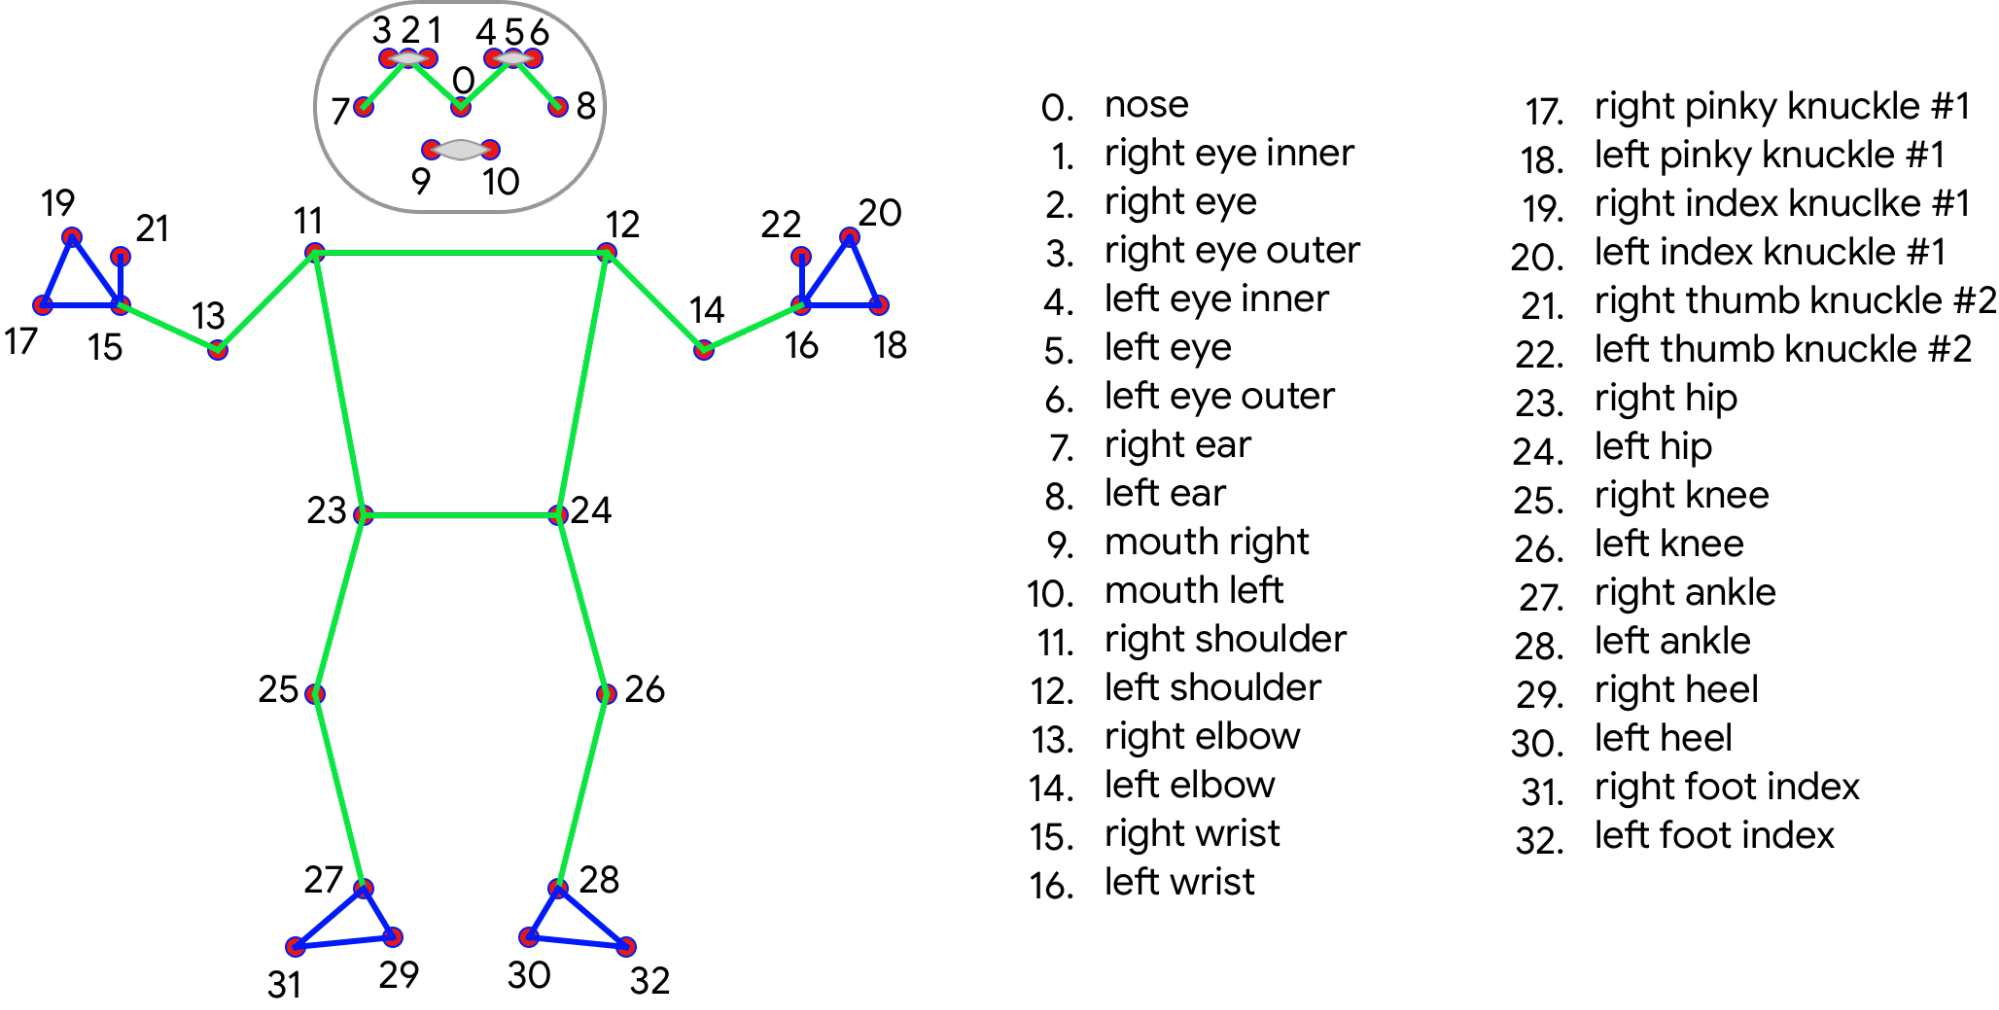

In [14]:
results.pose_landmarks.landmark??

Type:        RepeatedCompositeContainer
String form:
[x: 0.5036454200744629
y: 0.33182206749916077
z: -0.33268076181411743
visibility: 0.999998152256012
, x: 0.5085033178329468
y: 0.32041627168655396
z: -0.3208743929862976
visibility: 0.999993622303009
, x: 0.5109516382217407
y: 0.32025590538978577
z: -0.320863276720047
visibility: 0.9999938011169434
, x: 0.5129823684692383
y: 0.3199600577354431
z: -0.320881187915802
visibility: 0.9999940395355225
, x: 0.5003021359443665
y: 0.32077449560165405
z: -0.32083457708358765
visibility: 0.9999921321868896
, x: 0.4976053237915039
y: 0.3209553360939026
z: -0.3208775222301483
visibility: 0.9999921321868896
, x: 0.4954287111759186
y: 0.32094189524650574
z: -0.3208780884742737
visibility: 0.9999915361404419
, x: 0.5173256993293762
y: 0.32369735836982727
z: -0.22592444717884064
visibility: 0.9999908208847046
, x: 0.49276718497276306
y: 0.3247990012168884
z: -0.226784348487854
visibility: 0.9999852180480957
, x: 0.5093982219696045
y: 0.34423342347145

In [ ]:
cv2.imshow??

In [ ]:
cv2.VideoCapture??